In [2]:
%matplotlib inline
from pycwr.io.auto_io import radar_io 
import numpy as np
import pandas as pd
import xarray as xr

In [3]:
filename = r"Z_RADR_I_Z9576_20190810000600_O_DOR_SA_CAP.bin.bz2"

In [4]:
basedata = radar_io(filename) 

In [5]:
sradar = basedata.ToPyartRadar()

In [6]:
import matplotlib.pyplot as plt

8933 total observations (M)


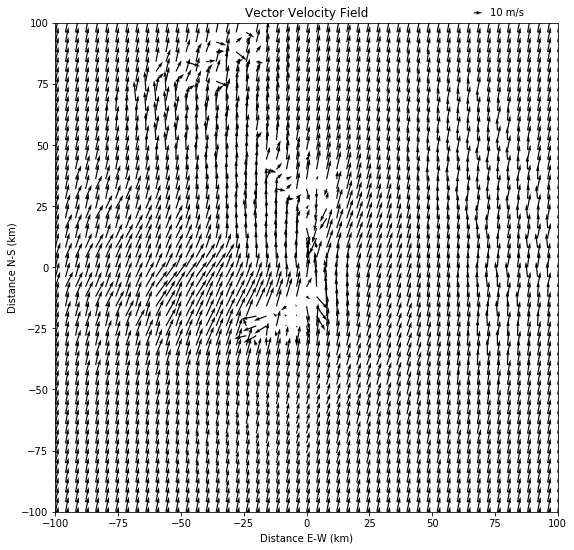

In [8]:
import singledop

wind = singledop.SingleDoppler2D(radar=sradar, 
                                 grid_spacing=0.25,
                                 L=1, 
                                 sweep_number=1, 
                                 name_vr='velocity',
                                 thin_factor=[4, 4],
                                 grid_edge=120,
                                 sigma=1
                                 )

swdisplay = singledop.AnalysisDisplay(wind)

fig, ax = plt.subplots(figsize=(9, 9))
swdisplay.plot_velocity_vectors(ax=ax, legend=10)

ax.set_xlim([-100, 100])
ax.set_ylim([-100, 100])

fig.savefig('sa_wind.png', dpi=300, bbox_inches='tight')

In [9]:
import singledop
sd_test = singledop.SingleDoppler2D(L=30.0, radar=sradar, range_limits=[0, 100],
                                    sweep_number=0, 
                                    thin_factor=[4, 12])

3016 total observations (M)


/home/liyuan3970/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


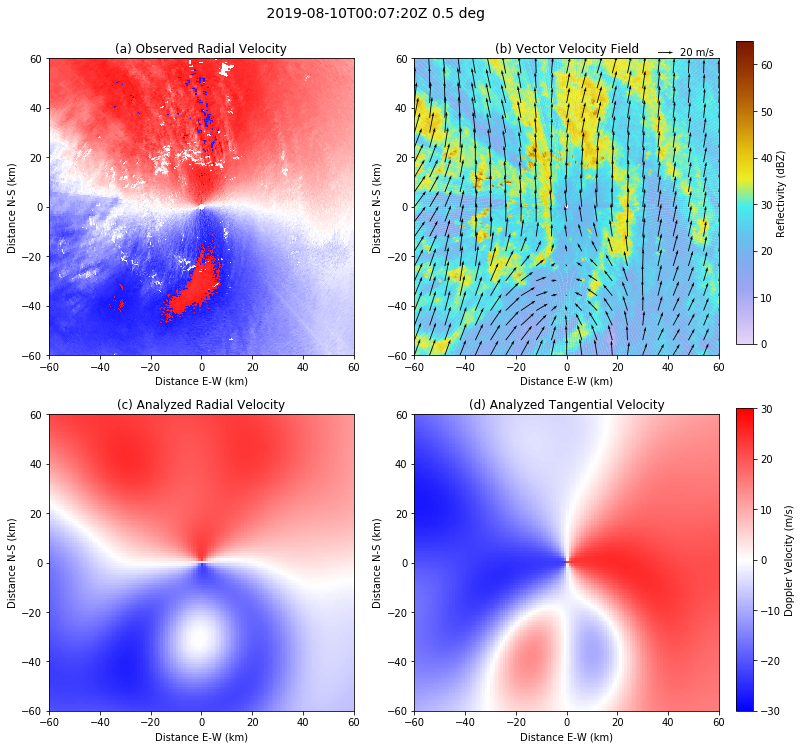

In [10]:


display = singledop.AnalysisDisplay(sd_test)
display.four_panel_plot(scale=400, legend=20, return_flag=False, thin=6,
                        levels=-30.0+2.0*np.arange(31))

